In [13]:
import itertools
from collections import defaultdict
import networkx as nx
import math
import matplotlib.pyplot as plt

import given

In [14]:
def manhattan_distance(x, y):
    return abs(x[0]-y[0]) + abs(x[1]-y[1])

def extract_candidate_distances(clients1, clients2, facilities1, facilities2):
    print("I'm inside extract candidates function")
    distances = set()
    for j in clients1 + clients2:
        for i in facilities1 + facilities2:
            distances.add(manhattan_distance(j, i))
    return sorted(distances)

In [15]:
# def greedy_k_supplier(clients, facilities, k, R):
#     """
#     Greedy algorithm: Place centers such that all clients are within R.
#     Each new facility covers as many uncovered clients as possible.
#     """
#     print("I'm inside greedy_s_supplier function")
#     uncovered = set(clients)
#     used_facilities = set()

#     while uncovered and len(used_facilities) < k:
#         # For each facility, count how many uncovered clients it can cover
#         best_f, covered = None, set()
#         for f in facilities:
#             covered_now = {j for j in uncovered if manhattan_distance(j, f) <= R}
#             if len(covered_now) > len(covered):
#                 best_f, covered = f, covered_now

#         if not covered:
#             return None  # Can't cover remaining clients with current R

#         used_facilities.add(best_f)
#         uncovered -= covered

#     if uncovered:
#         return None #cant satisfy all clients with radius r
#     return used_facilities

def greedy_k_supplier(clients, facilities, k, R):
    print("I'm inside greedy_s_supplier function")
    uncovered = list(clients)  # list of clients still to cover
    used_facilities = []

    while uncovered and len(used_facilities) < k:
        best_f, covered = None, []

        for f in facilities:
            covered_now = [j for j in uncovered if manhattan_distance(j, f) <= R]
            if len(covered_now) > len(covered):
                best_f, covered = f, covered_now

        if not covered:
            return None  # Can't cover remaining clients with current R

        used_facilities.append(best_f)
        # Remove covered clients
        uncovered = [c for c in uncovered if c not in covered]

    if uncovered:
        return None  # can't satisfy all clients with radius R

    return used_facilities


In [26]:
greedy_k_supplier(given.clients1,given.facilities1,given.k,6)

I'm inside greedy_s_supplier function


[[3, 3], [5, 2]]

In [19]:
def draw_bipartite_graph(G):
    # Extract nodes from each partition using node names
    left_nodes = [n for n in G.nodes if str(n).startswith('f1_')]
    right_nodes = [n for n in G.nodes if str(n).startswith('f2_')]

    pos = {}

    # Vertical positioning: evenly spaced
    for i, node in enumerate(left_nodes):
        pos[node] = (0, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (2, -i)

    plt.figure(figsize=(8, 6))
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='skyblue', label='Time 1')
    nx.draw_networkx_nodes(G, pos, nodelist=right_nodes, node_color='lightgreen', label='Time 2')

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.5)

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title("Bipartite Graph of Facility Movements")
    plt.axis('off')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
# def build_bipartite_graph(facilities1, facilities2, B):
#     print("Building bipartite graph")
#     G = nx.Graph()
#     for i, f1 in enumerate(facilities1):
#         for j, f2 in enumerate(facilities2):
#             if manhattan_distance(f1, f2) <= B:
#                 G.add_edge(f"f1_{i}", f"f2_{j}")
#                 print(f"{f1} and {f2} are atmost {manhattan_distance(f1,f2)} distances apart")
#                 print(f"{B}")
#     return G

def build_bipartite_graph(facilities1, facilities2, B):
    print("Building bipartite graph")
    G = nx.Graph()

    # Add all nodes from time 1 and time 2
    for i in range(len(facilities1)):
        G.add_node(f"f1_{i}")
    for j in range(len(facilities2)):
        G.add_node(f"f2_{j}")

    # Add edges based on Manhattan distance threshold B
    for i, f1 in enumerate(facilities1):
        for j, f2 in enumerate(facilities2):
            dist = manhattan_distance(f1, f2)
            if dist <= B:
                G.add_edge(f"f1_{i}", f"f2_{j}")
                print(f"{f1} and {f2} are at most {dist} apart (≤ {B})")
    return G



def has_valid_matching(G):
    if G.number_of_edges() == 0:
        return False

    # Extract left and right nodes
    left = [n for n in G.nodes if str(n).startswith("f1_")]
    right = [n for n in G.nodes if str(n).startswith("f2_")]

    try:
        matching = nx.bipartite.maximum_matching(G, top_nodes=left)
        matched_pairs = len(matching) // 2  # Each pair appears twice

        # Match size should be equal to the smaller side
        required_match_size = min(len(left), len(right))
        if matched_pairs == required_match_size:
            return True
        else:
            print("No possible movements")
            return False

    except nx.NetworkXPointlessConcept:
        return False

In [21]:
def is_feasible(R, B, clients1, clients2, facilities1, facilities2, k):
    S1 = greedy_k_supplier(clients1, facilities1, k, R)
    S2 = greedy_k_supplier(clients2, facilities2, k, R)
    if S1 is None or S2 is None:
        print("Cant cover all clients")
        return False

    G = build_bipartite_graph(list(S1), list(S2), B)
    draw_bipartite_graph(G)
    return has_valid_matching(G)

In [22]:
def binary_search_R_star(clients1, clients2, facilities1, facilities2, B, k):
    candidates = extract_candidate_distances(clients1, clients2, facilities1, facilities2)
    low, high = 0, len(candidates) - 1
    best_R = None

    while low <= high:
        mid = (low + high) // 2
        print(f"Checking if {candidates[mid]} is feasible")
        R = candidates[mid]
        if is_feasible(R, B, clients1, clients2, facilities1, facilities2, k):
            best_R = R
            high = mid - 1
        else:
            low = mid + 1

    return best_R

I'm inside extract candidates function
Checking if 5 is feasible
I'm inside greedy_s_supplier function
I'm inside greedy_s_supplier function
Building bipartite graph
[6, 1] and [5, 1] are at most 1 apart (≤ 3)


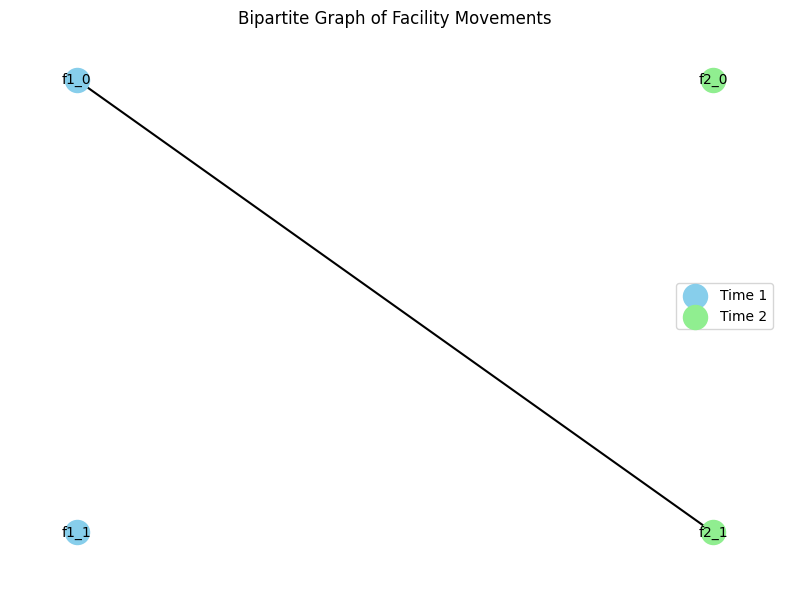

No possible movements
Checking if 8 is feasible
I'm inside greedy_s_supplier function
I'm inside greedy_s_supplier function
Building bipartite graph
[5, 2] and [3, 1] are at most 3 apart (≤ 3)


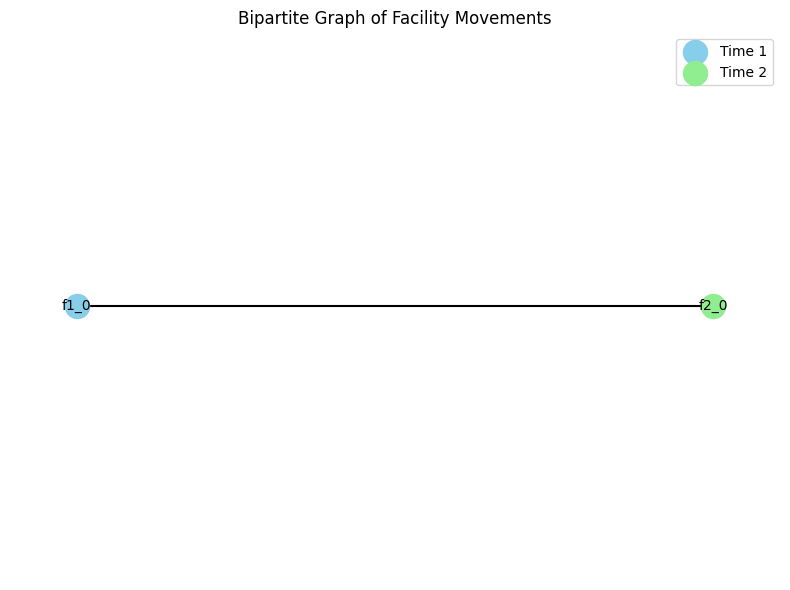

Checking if 6 is feasible
I'm inside greedy_s_supplier function
I'm inside greedy_s_supplier function
Building bipartite graph
[5, 2] and [5, 1] are at most 1 apart (≤ 3)


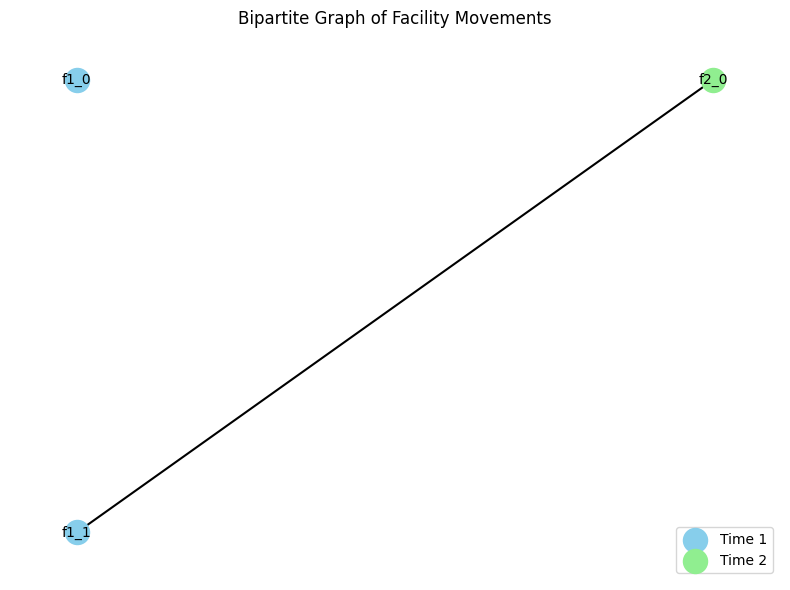

Guessed R* (minimum service radius): 6


In [23]:
R_star = binary_search_R_star(given.clients1, given.clients2, given.facilities1, given.facilities2, given.B, given.k)
print("Guessed R* (minimum service radius):", R_star)

In [25]:
with open("output.txt", "w") as file:
  # 3. Write the output to the file
  file.write(str(R_star))